In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

# Facebook _data_winbyinwi

In [33]:
with open('../../../data/external/facebook_data_backup/inwi_إنوي_facebook_data_20250605_195731.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [34]:
print(f"Type des données chargées : {type(data)}")

Type des données chargées : <class 'list'>


In [35]:
posts_df = pd.DataFrame(data if isinstance(data, list) else [data])
if 'comments' in posts_df.columns:
    posts_df = posts_df.drop(columns=['comments'])

#Convertir created_time en datetime
posts_df['created_time'] = pd.to_datetime(posts_df['created_time'])

In [36]:
posts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   post_id         16 non-null     object             
 1   source_id       16 non-null     object             
 2   created_time    16 non-null     datetime64[ns, UTC]
 3   updated_time    0 non-null      object             
 4   permalink       16 non-null     object             
 5   page_id         16 non-null     object             
 6   page_name       16 non-null     object             
 7   message         16 non-null     object             
 8   media_type      16 non-null     object             
 9   media_url       6 non-null      object             
 10  thumbnail_url   0 non-null      object             
 11  can_share       16 non-null     bool               
 12  shares          16 non-null     int64              
 13  can_comment     16 non-null     bool 

In [37]:
posts_df.isnull().sum()

post_id            0
source_id          0
created_time       0
updated_time      16
permalink          0
page_id            0
page_name          0
message            0
media_type         0
media_url         10
thumbnail_url     16
can_share          0
shares             0
can_comment        0
comments_count     0
can_like           0
like_count         0
hashtags           0
mentions           0
caption            0
description        0
platform           0
brand_name         0
dtype: int64

In [39]:

# 1. Colonnes à vérifier pour présence de chaînes vides
text_fields = [
    "post_id", "source_id", "created_time", "permalink", "page_id",
    "page_name", "message", "media_type", "media_url", "thumbnail_url"
]

print("🧪 Champs texte vides :")
for col in text_fields:
    empty_count = (posts_df[col].astype(str).str.strip() == '').sum()
    print(f" - {col}: {empty_count} lignes vides")

# 2. Vérification created_time valide
print("\n🕒 Vérification des timestamps invalides :")
invalid_dates = pd.to_datetime(posts_df["created_time"], errors="coerce").isna().sum()
print(f" - created_time non valides : {invalid_dates}")

# 3. Valeurs uniques des booléens
print("\n🔁 Valeurs uniques booléennes :")
for col in ["can_share", "can_comment"]:
    print(f" - {col}: {posts_df[col].nunique()} valeurs uniques ({posts_df[col].unique()})")

# 4. Champs numériques à 0
print("\n🔢 Champs numériques avec des zéros :")
for col in ["shares", "comments_count", "like_count"]:
    zero_count = (posts_df[col] == 0).sum()
    print(f" - {col} == 0 : {zero_count} lignes")

# 5. Listes : type check et nombre de listes vides
print("\n📚 Vérification des champs listes :")
for col in ["hashtags", "mentions"]:
    non_lists = posts_df[~posts_df[col].apply(lambda x: isinstance(x, list))].shape[0]
    empty_lists = posts_df[posts_df[col].apply(lambda x: isinstance(x, list) and len(x) == 0)].shape[0]
    print(f" - {col} : {non_lists} non-listes / {empty_lists} listes vides")

🧪 Champs texte vides :
 - post_id: 0 lignes vides
 - source_id: 0 lignes vides
 - created_time: 0 lignes vides
 - permalink: 0 lignes vides
 - page_id: 0 lignes vides
 - page_name: 0 lignes vides
 - message: 0 lignes vides
 - media_type: 0 lignes vides
 - media_url: 0 lignes vides
 - thumbnail_url: 0 lignes vides

🕒 Vérification des timestamps invalides :
 - created_time non valides : 0

🔁 Valeurs uniques booléennes :
 - can_share: 1 valeurs uniques ([ True])
 - can_comment: 1 valeurs uniques ([ True])

🔢 Champs numériques avec des zéros :
 - shares == 0 : 2 lignes
 - comments_count == 0 : 3 lignes
 - like_count == 0 : 0 lignes

📚 Vérification des champs listes :
 - hashtags : 0 non-listes / 1 listes vides
 - mentions : 0 non-listes / 15 listes vides


In [40]:
 #Ajouter des colonnes utiles
posts_df['day'] = posts_df['created_time'].dt.date
posts_df['hour'] = posts_df['created_time'].dt.hour
posts_df['message_length'] = posts_df['message'].fillna('').apply(len)

In [41]:
#Aperçu général
print(posts_df.describe(include='all'))
print(posts_df.dtypes)
print(posts_df.head())
print(posts_df["post_id"].nunique())

                   post_id       source_id  \
count                   16              16   
unique                  16              13   
top     122121254990821642  61574649282594   
freq                     1               2   
mean                   NaN             NaN   
min                    NaN             NaN   
25%                    NaN             NaN   
50%                    NaN             NaN   
75%                    NaN             NaN   
max                    NaN             NaN   
std                    NaN             NaN   

                               created_time updated_time  \
count                                    16            0   
unique                                  NaN            0   
top                                     NaN          NaN   
freq                                    NaN          NaN   
mean    2025-04-30 18:15:07.562500096+00:00          NaN   
min               2025-03-18 21:51:12+00:00          NaN   
25%        2025-03-28 15:03

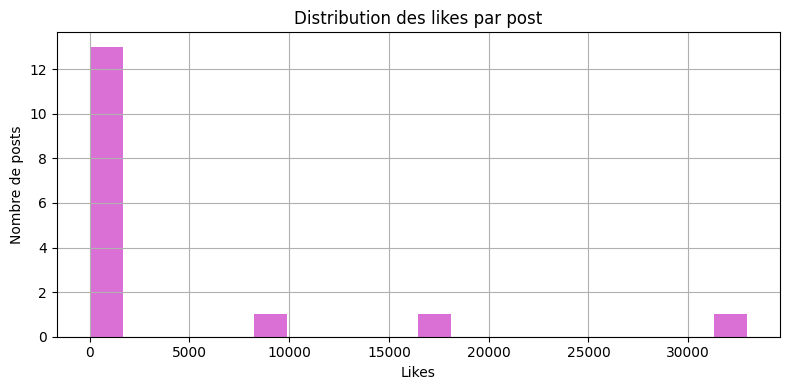

In [42]:

# 1. Histogramme des likes
plt.figure(figsize=(8, 4))
plt.hist(posts_df['like_count'], bins=20, color='orchid')
plt.title("Distribution des likes par post")
plt.xlabel("Likes")
plt.ylabel("Nombre de posts")
plt.grid(True)
plt.tight_layout()
plt.show()

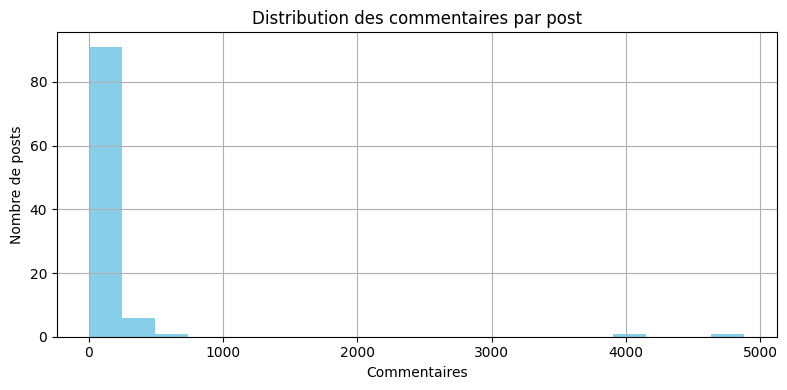

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(posts_df['comments_count'], bins=20, color='skyblue')
plt.title("Distribution des commentaires par post")
plt.xlabel("Commentaires")
plt.ylabel("Nombre de posts")
plt.grid(True)
plt.tight_layout()
plt.show()

      month  count
0   2024-07     12
1   2024-08     17
2   2024-09      6
3   2024-10     13
4   2024-11      6
5   2024-12      7
6   2025-01     10
7   2025-02      5
8   2025-03     11
9   2025-04      5
10  2025-05      5
11  2025-06      3


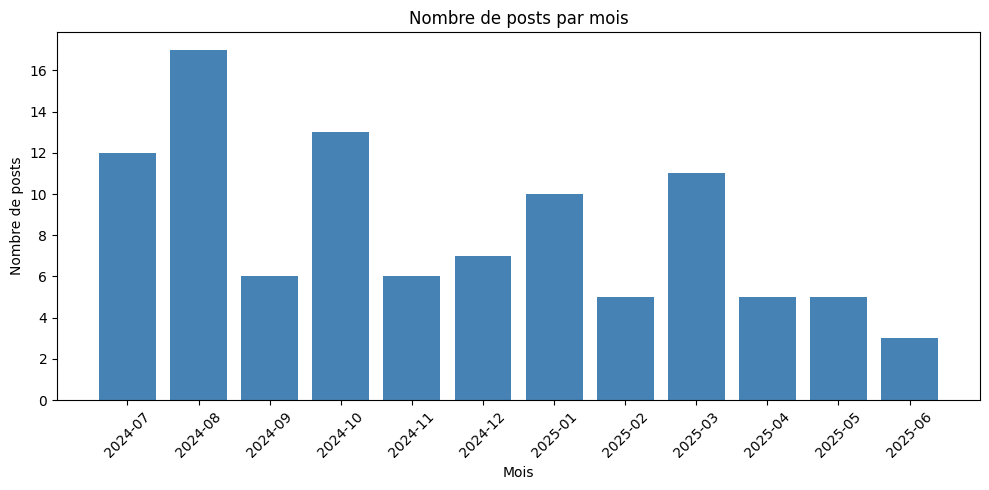

In [15]:
posts_df['month'] = posts_df['created_time'].dt.to_period('M').astype(str)

# 3. Compter les posts par mois
posts_per_month = posts_df.groupby('month').size().reset_index(name='count')

# 4. Afficher les valeurs
print(posts_per_month)

# 5. Visualisation
plt.figure(figsize=(10, 5))
plt.bar(posts_per_month['month'], posts_per_month['count'], color='steelblue')
plt.title("Nombre de posts par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

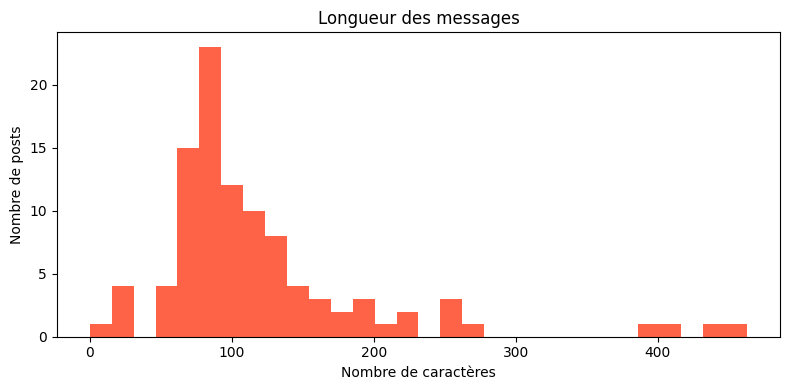

In [16]:
# Longueur des messages
plt.figure(figsize=(8, 4))
plt.hist(posts_df['message_length'], bins=30, color='tomato')
plt.title("Longueur des messages")
plt.xlabel("Nombre de caractères")
plt.ylabel("Nombre de posts")
plt.tight_layout()
plt.show()

In [21]:
def parse_count(value):
    if not value:
        return 0
    if isinstance(value, int):
        return value
    if isinstance(value, float):
        return int(value)
    value = str(value).strip().upper()
    try:
        if value.endswith('K') or value.endswith('k') :
            return int(float(value[:-1]) * 1000)
        elif value.endswith('M'):
            return int(float(value[:-1]) * 1_000_000)
        else:
            return int(value)
    except ValueError:
        return 0

In [22]:
all_comments = []

for post in data:
    comments = post.get('comments', [])
    
    if comments:
        for comment in comments:
            comment_flat = {
                'comment_id': comment.get('comment_id', ''),
                'message': comment.get('message', ''),
                'created_time': comment.get('created_time', ''),
                'like_count': parse_count(comment.get('like_count', 0)),
                'reply_count': parse_count(comment.get('reply_count', 0)),
                'user_id': comment.get('user_id', ''),
                'user_name': comment.get('user_name', ''),
                'comment_url': comment.get('comment_url', ''),
                'comment_length': len(comment.get('message', '')),
                'platform': comment.get('platform', ''),
                'brand_name': comment.get('brand_name', '')
            }
            all_comments.append(comment_flat)

comments_df = pd.DataFrame(all_comments)
comments_df['created_time'] = pd.to_datetime(comments_df['created_time'], errors='coerce')

print(comments_df.head())


         comment_id                                            message  \
0  1234033491702046  مزال مهداكم الله تدوزو ليا واحد remboursement ...   
1  4052044455046938  J'ai oublié mon mot de passe de mon compte win...   
2  1924792288332814                                ‏عيد مبارك سعيد win   
3  1052396893504978  Nass dwin jawboni ohllo lia lmochkil, ana oga3...   
4  1657038488280678                        واش كاتخدمو سيمانة كاملة ؟؟   

               created_time  like_count  reply_count  \
0 2025-06-07 10:33:26+00:00           1            2   
1 2025-06-09 01:46:12+00:00           0            3   
2 2025-06-07 10:55:15+00:00           0            0   
3 2025-06-11 13:18:09+00:00           0            2   
4 2025-06-07 11:39:20+00:00           0            1   

                                             user_id            user_name  \
0  pfbid02DZ2U5yoWEC3RKmQzFff28Cd5MRRvyH6QUsLkBBC...  Abderrahim Marghich   
1  pfbid0r6MipwSym1yake2nLbUWMhaM4qCCBiHkQj1gEpz3...       Abd E

In [23]:
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6231 entries, 0 to 6230
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   comment_id      6231 non-null   object             
 1   message         6231 non-null   object             
 2   created_time    6231 non-null   datetime64[ns, UTC]
 3   like_count      6231 non-null   int64              
 4   reply_count     6231 non-null   int64              
 5   user_id         6231 non-null   object             
 6   user_name       6231 non-null   object             
 7   comment_url     6231 non-null   object             
 8   comment_length  6231 non-null   int64              
 9   platform        6231 non-null   object             
 10  brand_name      6231 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 535.6+ KB


In [24]:
comments_df["comment_id"].nunique()

6231

In [25]:
# 1. Trouver les comment_id dupliqués
duplicated_ids = comments_df['comment_id'][comments_df['comment_id'].duplicated()]

# 2. Accéder aux lignes complètes avec ces comment_id
duplicated_comments = comments_df[comments_df['comment_id'].isin(duplicated_ids)]

# 3. Afficher les résultats
print(f"Nombre de commentaires dupliqués : {duplicated_comments.shape[0]}")
print(duplicated_comments[['comment_id', 'message', 'created_time']])


Nombre de commentaires dupliqués : 0
Empty DataFrame
Columns: [comment_id, message, created_time]
Index: []


In [26]:
print(comments_df.shape)
print(comments_df.dtypes)
comments_df.head()

(6231, 11)
comment_id                     object
message                        object
created_time      datetime64[ns, UTC]
like_count                      int64
reply_count                     int64
user_id                        object
user_name                      object
comment_url                    object
comment_length                  int64
platform                       object
brand_name                     object
dtype: object


,comment_id,message,created_time,like_count,reply_count,user_id,user_name,comment_url,comment_length,platform,brand_name
0,1234033491702046,مزال مهداكم الله تدوزو ليا واحد remboursement ...,2025-06-07 10:33:26+00:00,1,2,pfbid02DZ2U5yoWEC3RKmQzFff28Cd5MRRvyH6QUsLkBBC...,Abderrahim Marghich,https://www.facebook.com/reel/1422500872098554...,64,facebook,winbyinwi
1,4052044455046938,J'ai oublié mon mot de passe de mon compte win...,2025-06-09 01:46:12+00:00,0,3,pfbid0r6MipwSym1yake2nLbUWMhaM4qCCBiHkQj1gEpz3...,Abd Elhamdaoui,https://www.facebook.com/reel/1422500872098554...,118,facebook,winbyinwi
2,1924792288332814,‏عيد مبارك سعيد win,2025-06-07 10:55:15+00:00,0,0,100021602716459,Abdlmajid Nassiri,https://www.facebook.com/reel/1422500872098554...,19,facebook,winbyinwi
3,1052396893504978,"Nass dwin jawboni ohllo lia lmochkil, ana oga3...",2025-06-11 13:18:09+00:00,0,2,pfbid0frh5uEi79JUwrwnJCgfpWAouZKfZD4Y4GAY4Rr8h...,Mouhssine Assaoud,https://www.facebook.com/reel/1422500872098554...,373,facebook,winbyinwi
4,1657038488280678,واش كاتخدمو سيمانة كاملة ؟؟,2025-06-07 11:39:20+00:00,0,1,pfbid02Q2TDFDdypSxmVJYWyZcbHkj2FJZz1qYUFuj2hUH...,Ahmed Amnay,https://www.facebook.com/reel/1422500872098554...,27,facebook,winbyinwi


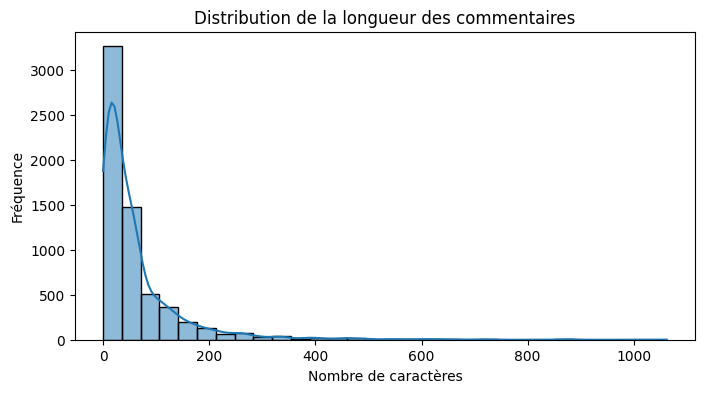

In [28]:

plt.figure(figsize=(8,4))
sns.histplot(comments_df['comment_length'], bins=30, kde=True)
plt.title("Distribution de la longueur des commentaires")
plt.xlabel("Nombre de caractères")
plt.ylabel("Fréquence")
plt.show()

In [30]:
message = comments_df[comments_df["comment_length"] > 1000]["message"].iloc[0]
print(message)


Bonjour

 Je suis un client chez vous depuis 2021. J'ai presque jamais eu recours à votre assistance en chat jusqu'à hier. J'ai eu un problème d'accès à internet et j'ai pris contact avec une conseillère dénommée AYA. La dame n'a fait que me faire balader durant un long moment (plus de 45min) avec des questions qui n'ont rien à voir avec ma demande d'assistance, tout cela pour boucler sa journée de travail qui prend fin à 22h mettre fin de sa part à la soit disant l'assistance. Je vous envoie ci-joint les screenshots de la conversation pour en juger de vous même. Dans les pires cas de demande d'assistance je n'ai était pris pour un retardé mental tel que j'ai était traité hier soir (11/01/2025) et c'est la première fois de ma vie que je dépose une réclamation suite à une très mauvais traitement de ma personne et de ma demande en tant que client.

L'image de votre société et des service qu'elle fournit sera surement terni par de tel enfantillages qui ne font ni résoudre les demandes des

In [31]:
# 1. Colonnes texte à vérifier (adapter selon les colonnes disponibles dans comments_df)
text_fields = [
    "comment_id", "user_id", "user_name", "message", "created_time"
]

print("🧪 Champs texte vides (commentaires) :")
for col in text_fields:
    empty_count = (comments_df[col].astype(str).str.strip() == '').sum()
    print(f" - {col}: {empty_count} lignes vides")

# 2. Vérification created_time valide
print("\n🕒 Vérification des timestamps invalides (commentaires) :")
invalid_dates = pd.to_datetime(comments_df["created_time"], errors="coerce").isna().sum()
print(f" - created_time non valides : {invalid_dates}")

# 3. Valeurs uniques des booléens (si existent, ex: can_like, peut être adapté à ton cas)
bool_fields = [col for col in ["can_like"] if col in comments_df.columns]

print("\n🔁 Valeurs uniques booléennes (commentaires) :")
for col in bool_fields:
    print(f" - {col}: {comments_df[col].nunique()} valeurs uniques ({comments_df[col].unique()})")

# 4. Champs numériques : valeurs à 0
numeric_fields = [col for col in ["like_count", "reply_count"] if col in comments_df.columns]

print("\n🔢 Champs numériques avec des zéros (commentaires) :")
for col in numeric_fields:
    zero_count = (comments_df[col] == 0).sum()
    print(f" - {col} == 0 : {zero_count} lignes")

# 5. Listes : hashtags et mentions dans les commentaires (si présents)
list_fields = [col for col in ["hashtags", "mentions"] if col in comments_df.columns]

print("\n📚 Vérification des champs listes (commentaires) :")
for col in list_fields:
    non_lists = comments_df[~comments_df[col].apply(lambda x: isinstance(x, list))].shape[0]
    empty_lists = comments_df[comments_df[col].apply(lambda x: isinstance(x, list) and len(x) == 0)].shape[0]
    print(f" - {col} : {non_lists} non-listes / {empty_lists} listes vides")

🧪 Champs texte vides (commentaires) :
 - comment_id: 0 lignes vides
 - user_id: 0 lignes vides
 - user_name: 0 lignes vides
 - message: 390 lignes vides
 - created_time: 0 lignes vides

🕒 Vérification des timestamps invalides (commentaires) :
 - created_time non valides : 0

🔁 Valeurs uniques booléennes (commentaires) :

🔢 Champs numériques avec des zéros (commentaires) :
 - like_count == 0 : 5036 lignes
 - reply_count == 0 : 3932 lignes

📚 Vérification des champs listes (commentaires) :
